# Problem Statement: - 
The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules


In [4]:
groceries = []
with open(r"C:\Users\ali umar hasan\Desktop\data science\Association rules\groceries.csv") as f:
    groceries = f.read()

In [5]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")

In [6]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))


In [7]:
all_groceries_list = [i for item in groceries_list for i in item]


In [8]:
from collections import Counter # ,OrderedDict

item_frequencies = Counter(all_groceries_list)

In [9]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])


In [10]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


<ipython-input-11-8f013887356d>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')


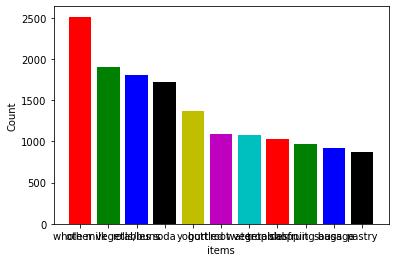

In [11]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()


In [12]:
# Creating Data Frame for the transactions data
groceries_series = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835, :] # removing the last empty transaction


In [13]:
groceries_series.columns = ["transactions"]

In [14]:
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')


In [15]:
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)


In [16]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)


<ipython-input-17-259513ee75c4>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')


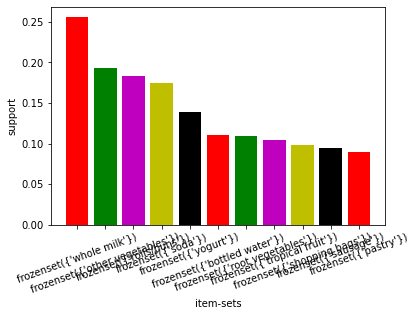

In [17]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()


In [18]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1173,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1172,"(yogurt, other vegetables)","(tropical fruit, whole milk)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1090,"(yogurt, root vegetables)","(whole milk, other vegetables)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
1091,"(whole milk, other vegetables)","(yogurt, root vegetables)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
793,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1171,"(yogurt, whole milk)","(tropical fruit, other vegetables)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1174,"(tropical fruit, other vegetables)","(yogurt, whole milk)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1052,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1049,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123


In [19]:
def to_list(i):
    return (sorted(list(i)))


In [20]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [21]:
ma_X = ma_X.apply(sorted)

In [22]:
rules_sets = list(ma_X)


In [23]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]


In [24]:
index_rules = []


In [25]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [26]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [27]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
678,"(tropical fruit, other vegetables)",(pip fruit),0.035892,0.075648,0.009456,0.263456,3.482649,0.006741,1.254985
558,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
1084,"(yogurt, whole milk, other vegetables)",(root vegetables),0.022267,0.108998,0.007829,0.351598,3.225716,0.005402,1.374150
172,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
942,"(root vegetables, whole milk)",(butter),0.048907,0.055414,0.008236,0.168399,3.038910,0.005526,1.135864
534,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
360,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
710,"(yogurt, whole milk)",(butter),0.056024,0.055414,0.009354,0.166969,3.013104,0.006250,1.133914
1064,"(whipped/sour cream, tropical fruit)",(other vegetables),0.013828,0.193493,0.007829,0.566176,2.926088,0.005154,1.859068
